# QUESTION 1

# 1. LOAD THE DATA SET

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
#!pip install --upgrade sklearn

In [2]:
data1 = pd.read_csv(r"D:\1.PHUONG-USQ\CSC8003-Machine Learning\Assignment 1\Q1_data.csv")
df1=pd.DataFrame(data1)

# 2. EXPLORE THE DATASET (Features identification)

In [3]:
# To check the dataset
print("Dataframe info: ", df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
Dataframe info:  No

In [4]:
# column names
print(df1.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [5]:
# for the correlation matrix
print("\nCorrelation matrix of all variables \n", df1.corr())


Correlation matrix of all variables 
                      id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0

# 3.TRAINING-TEST SPLIT

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# select features to use in model
input_data = np.array(df1[["bedrooms","bathrooms","sqft_living",
                          "floors","waterfront","view",
                          "grade","sqft_above","sqft_basement",
                          "yr_built","yr_renovated","zipcode",
                          "sqft_living15","sqft_lot15"]])
# reshape the array
input_data.resize((input_data.shape[0],14)) 
#print('input data:',input_data)

output_data = np.array(df1["price"])
output_data.resize((output_data.shape[0],1))
#print('output data:',output_data)

# Divide the training data and testing data (90% training and 10% test)
X_multi_train, X_multi_test, y_train, y_test = train_test_split(input_data, output_data, 
                                                                test_size=0.1, random_state = 42)

print("X train shape:",X_multi_train.shape)
print("X test shape:",X_multi_test.shape)
print("y train shape:",y_train.shape)
print("y test shape:",y_test.shape)

X train shape: (19451, 14)
X test shape: (2162, 14)
y train shape: (19451, 1)
y test shape: (2162, 1)


In [7]:
# Save the training data and testing data on two separate files
# 1.TRAINING DATA 
# Stack two numpy arrays
training_data_combined = np.column_stack((X_multi_train,y_train))
# Convert numpy arrays to DataFrame
training_data_df = pd.DataFrame(training_data_combined,
                                columns = ["bedrooms","bathrooms","sqft_living",
                                           "floors","waterfront","view",
                                           "grade","sqft_above","sqft_basement",
                                           "yr_built","yr_renovated","zipcode",
                                           "sqft_living15","sqft_lot15","price"])
# Save to csv file
training_data_df.to_csv(r"D:\1.PHUONG-USQ\CSC8003-Machine Learning\Assignment 1\training_data.csv")

# 2.TEST DATA 
# Stack two numpy arrays
test_data_combined = np.column_stack((X_multi_test,y_test))
# Convert numpy arrays to DataFrame
test_data_df = pd.DataFrame(test_data_combined,
                                columns = ["bedrooms","bathrooms","sqft_living",
                                           "floors","waterfront","view",
                                           "grade","sqft_above","sqft_basement",
                                           "yr_built","yr_renovated","zipcode",
                                           "sqft_living15","sqft_lot15","price"])
# Save to csv file
test_data_df.to_csv(r"D:\1.PHUONG-USQ\CSC8003-Machine Learning\Assignment 1\test_data.csv") 

# 4.FIT THE MODEL

In [8]:
from sklearn import linear_model

regression_df = linear_model.LinearRegression()  
regression_df.fit(X_multi_train, y_train) 

# Slope and intercept
slope = regression_df.coef_
intercept = regression_df.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  [[-3.94697851e+04  5.05503293e+04  1.09902342e+02  2.32706761e+04
   5.65141266e+05  4.34354015e+04  1.18580086e+05  5.09215997e+01
   5.89807428e+01 -3.75384854e+03  4.85750204e+00 -3.27788840e+01
   2.34505408e+01 -5.54105924e-01]]
Intercept:  [9845509.23172088]


# 5. TEST THE MODEL

In [9]:
from sklearn.metrics import r2_score

# Predicted y values using model
y_pred = regression_df.predict(X_multi_test)
# Print the score
linear_rsq = r2_score(y_test, y_pred)
print(f"R^2:", round(linear_rsq, 3))

R^2: 0.645


# 5. PRINT THE MODEL

#The fitted model:
$$y = -3.94697851e+04x(bedrooms) + 5.05503293e+04x(bathrooms) + 1.09902342e+02x(sqft_living)
      +2.32706761e+04x(floors) + 5.65141266e+05x(waterfront) + 4.34354015e+04x(view)
      +1.18580086e+05x(grade) + 5.09215997e+01x(sqft_above) + 5.89807428e+01x(sqft_basement) 
      -3.75384854e+03x(yr_built) + 4.85750204e+00x(yr_renovated) -3.27788840e+01x(zipcode)
      +2.34505408e+01x(sqft_living15) - 5.54105924e-01x(sqft_lot15) + 9845509.23172088$$  
                                          

#     QUESTION 2

# 1.LOAD THE DATA SET

In [10]:
#import packages
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics
from matplotlib import pyplot as plt

In [11]:
# load the training data
data2 = pd.read_csv(r"D:\1.PHUONG-USQ\CSC8003-Machine Learning\Assignment 1\Q2_Training.csv")
df2=pd.DataFrame(data2)
# Load the testing data
data3 = pd.read_csv(r"D:\1.PHUONG-USQ\CSC8003-Machine Learning\Assignment 1\Q2_Testing.csv")
df3=pd.DataFrame(data3)

# 2.EXPLORE THE DATA SET

In [12]:
# To check the dataset
print("Dataframe info: ", df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
Dataframe info:  None


In [13]:
# check the feature values
features = df2.iloc[:,:132].columns.values.tolist()

print("\nThese are the training feature values:  \n",features)


These are the training feature values:  
 ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_

In [14]:
# check the target values
target = df2["prognosis"].drop_duplicates(keep="first").tolist()
print("\nThese are the predictive feature values:  \n", target)


These are the predictive feature values:  
 ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']


# 3. TRAIN THE MODEL

In [15]:
# set the training input
#X_train = df2.iloc[:,:132]
X_train = df2[features]
y_train = df2["prognosis"]

# set the testing input
#X_test = df3.iloc[:,:132]
X_test = df3[features]
y_test = df3["prognosis"]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4920, 132)
(4920,)
(41, 132)
(41,)


In [16]:
# create a classifier
dt = DecisionTreeClassifier(criterion="entropy",max_depth=6)

# fit the model with the input of training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 4. TEST THE MODEL

In [17]:
# predict by feeding the testing set into the model
y_pred = dt.predict(X_test)

# Calculate the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.926829268292683


# 5. PRINT THE DECISION TREE

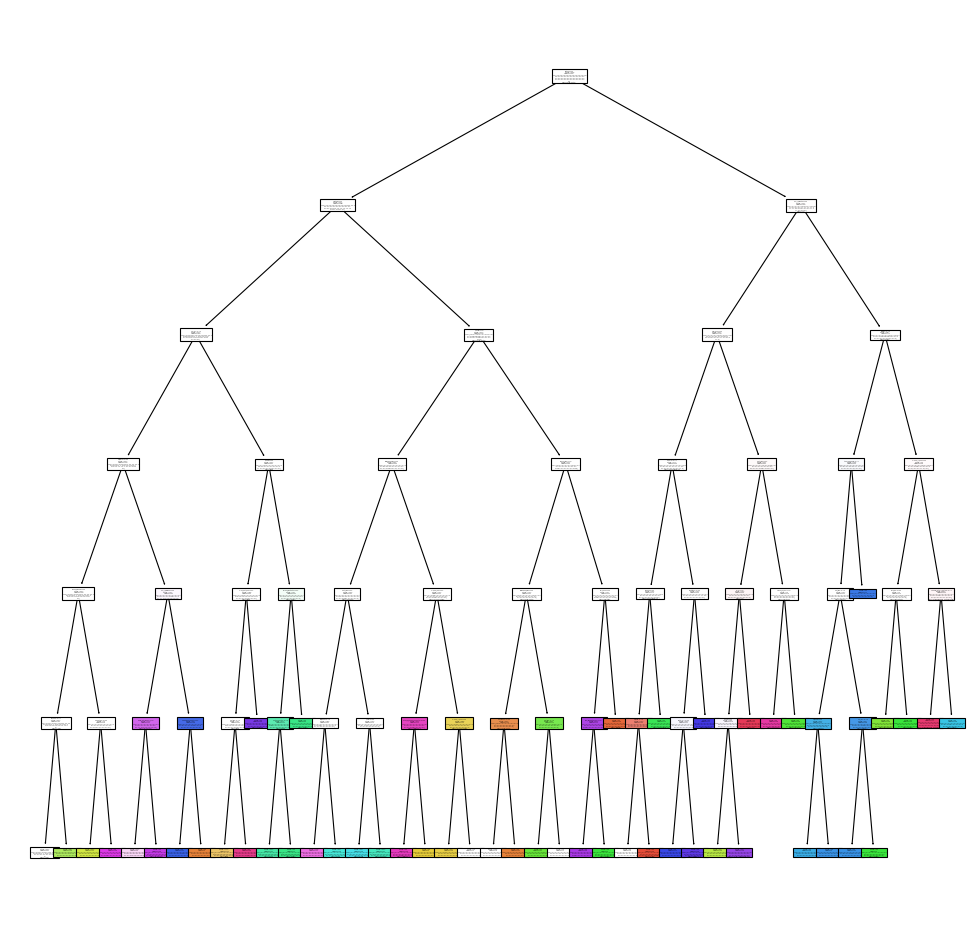

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (15,15), dpi=80)
#to hide text, return _ 
_ = tree.plot_tree(dt,
               feature_names = features, 
               class_names=target,
               filled = True)

In [19]:
text_representation = tree.export_text(dt,feature_names = features, 
)
print(text_representation)

|--- fatigue <= 0.50
|   |--- vomiting <= 0.50
|   |   |--- skin_rash <= 0.50
|   |   |   |--- headache <= 0.50
|   |   |   |   |--- painful_walking <= 0.50
|   |   |   |   |   |--- dizziness <= 0.50
|   |   |   |   |   |   |--- class: AIDS
|   |   |   |   |   |--- dizziness >  0.50
|   |   |   |   |   |   |--- class: Cervical spondylosis
|   |   |   |   |--- painful_walking >  0.50
|   |   |   |   |   |--- hip_joint_pain <= 0.50
|   |   |   |   |   |   |--- class: Arthritis
|   |   |   |   |   |--- hip_joint_pain >  0.50
|   |   |   |   |   |   |--- class: Osteoarthristis
|   |   |   |--- headache >  0.50
|   |   |   |   |--- loss_of_balance <= 0.50
|   |   |   |   |   |--- visual_disturbances <= 0.50
|   |   |   |   |   |   |--- class: Paralysis (brain hemorrhage)
|   |   |   |   |   |--- visual_disturbances >  0.50
|   |   |   |   |   |   |--- class: Migraine
|   |   |   |   |--- loss_of_balance >  0.50
|   |   |   |   |   |--- spinning_movements <= 0.50
|   |   |   |   |   |   |---

In [20]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)